In [72]:

# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2024-02-18 14:03:44--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.01s   

2024-02-18 14:03:44 (5.55 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2024-02-18 14:03:44--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

# **1- Filtre Moyenneur :**

Lire une image :

(188, 143)

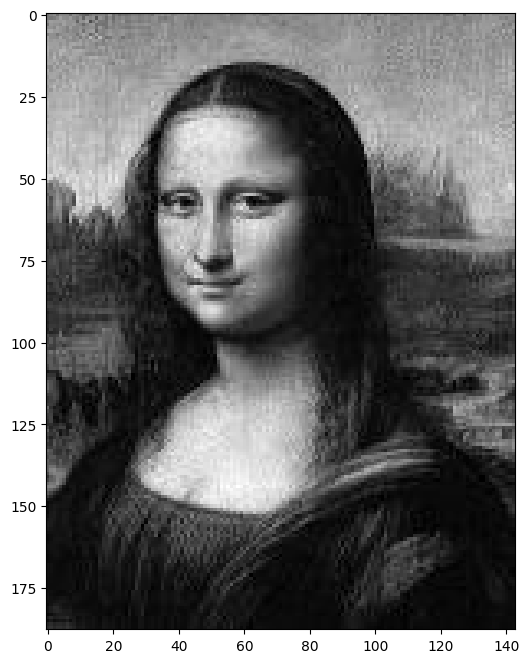

In [60]:
img= cv2.imread("mona.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
img.shape

La fonction du filtre moyenneur :

In [61]:
import cv2
import numpy as np

def meanFilter(image, k):
    hauteur, largeur = image.shape[:2]

    # Initialiser une image vide pour stocker le résultat
    image_filtree = np.zeros_like(image)
    kernelsize=2*k+1
    # Calculer la taille du padding
    bordure = kernelsize// 2

    # Ajouter du padding à l'image
    padded_image = cv2.copyMakeBorder(image, bordure, bordure, bordure, bordure, cv2.BORDER_CONSTANT)

    for y in range(bordure, hauteur + bordure):
        for x in range(bordure, largeur +bordure):
            zone = image[y - bordure:y + bordure + 1, x - bordure:x + bordure + 1]
            valeur_pixel = int(np.mean(zone))
            image_filtree[y - bordure, x - bordure] = valeur_pixel

    return image_filtree

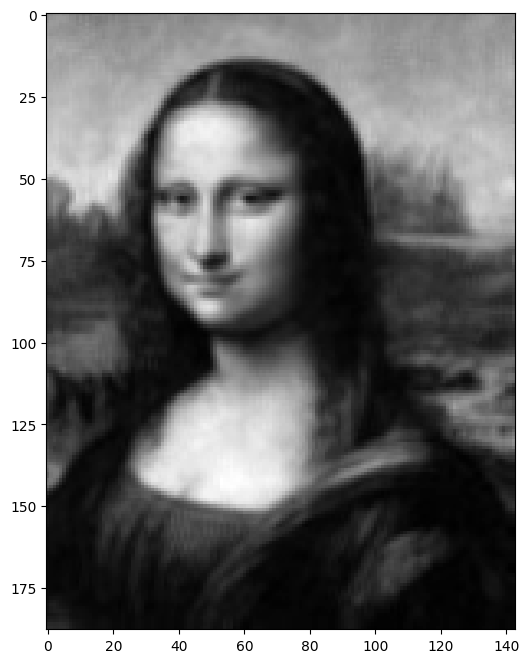

In [62]:
img1= meanFilter(img,1)
plt.imshow(img1, cmap='gray')

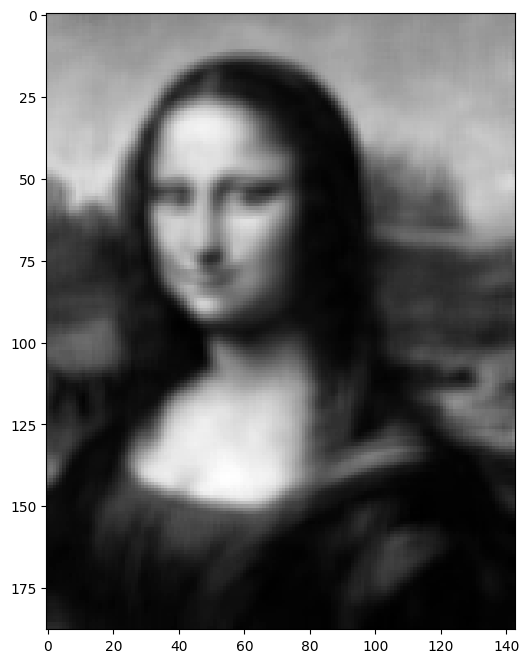

In [63]:
img2= meanFilter(img,2)
plt.imshow(img2, cmap='gray')

In [64]:
import numpy as np
import cv2

def convolution(image, kernel):
   # Dimensions de l'image et du noyau
    hauteur_image, largeur_image = image.shape[:2]
    hauteur_noyau, largeur_noyau = noyau.shape[:2]

    #  matrice pour stocker le résultat de la convolution
    resultat_convolution = np.zeros_like(image)

    # Parcours de l'image
    for i in range(hauteur_image):
        for j in range(largeur_image):
            somme = 0
            # Parcours du noyau
            for m in range(hauteur_noyau):
                for n in range(largeur_noyau):
                    index_i = i - hauteur_noyau // 2 + m
                    index_j = j - largeur_noyau // 2 + n
                    # Si les indices sont dans les limites de l'image
                    if index_i >= 0 and index_i < hauteur_image and index_j >= 0 and index_j < largeur_image:
                        somme += image[index_i, index_j] * noyau[m, n]
            resultat_convolution[i, j] = somme

    return resultat_convolution


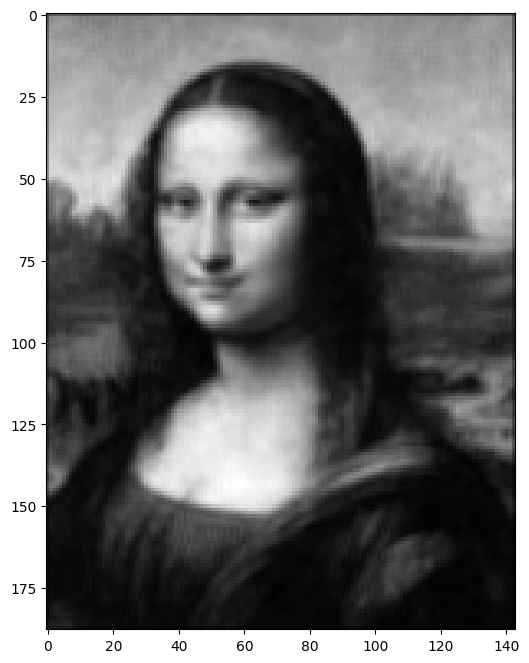

In [65]:
noyau = np.array([[1/9, 1/9, 1/9],
                  [1/9,1/9,1/9],
                  [1/9,1/9,1/9]])

# Appliquer la convolution à l'image
image_conv = convolution(img, noyau)
plt.imshow(image_conv, cmap='gray')

Filtre médian :

In [66]:
import numpy as np
import cv2

def median_filter(image, kernel_size):
    height, width = image.shape[:2]

    # Initialiser une image vide pour stocker le résultat
    filtered_image = np.zeros_like(image)

    # Calculer la taille du padding
    pad = kernel_size // 2

    # Ajouter du padding à l'image
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_CONSTANT)

    # Parcourir chaque pixel de l'image (à l'exception du bord)
    for y in range(pad, height + pad):
        for x in range(pad, width + pad):
            # Extraire la fenêtre de voisinage autour du pixel
            window = padded_image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            # Appliquer le filtre médian à la fenêtre
            filtered_image[y - pad, x - pad] = np.median(window)

    return filtered_image


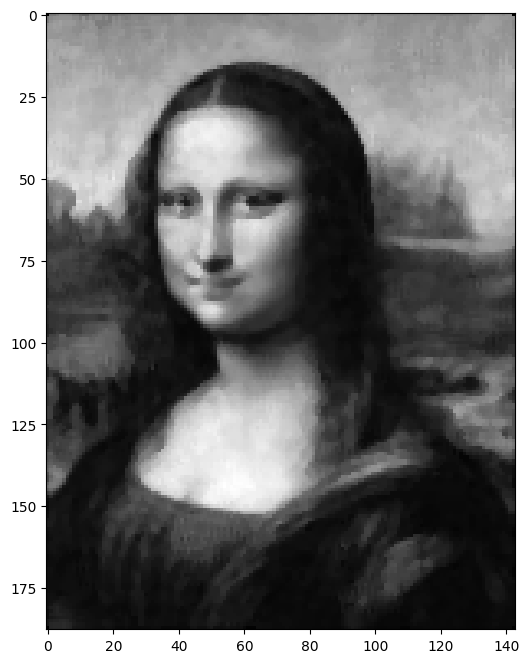

In [67]:

filtered_image = median_filter(img, 3)
plt.imshow(filtered_image, cmap='gray')

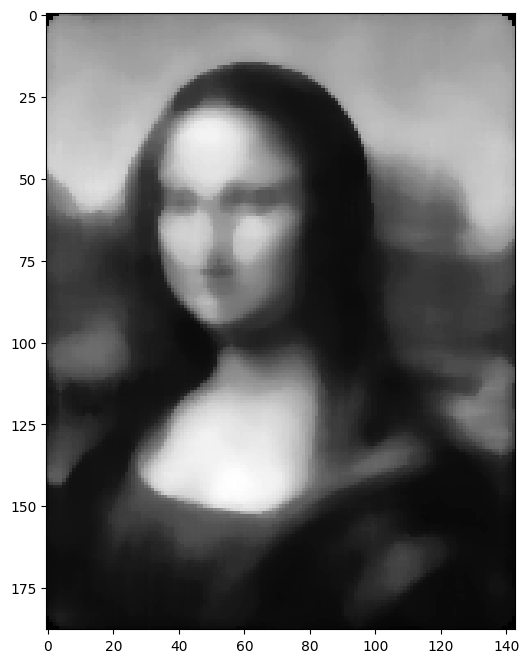

In [68]:

filtered_image = median_filter(img, 9)
plt.imshow(filtered_image, cmap='gray')

Transposé d'une image :

In [69]:
import numpy as np

def TransposeImg(img):
    transposed = []
    for i in range(len(img[0])):
        transposed_row = []
        for row in img:
            transposed_row.append(row[i])
        transposed.append(transposed_row)
    return transposed


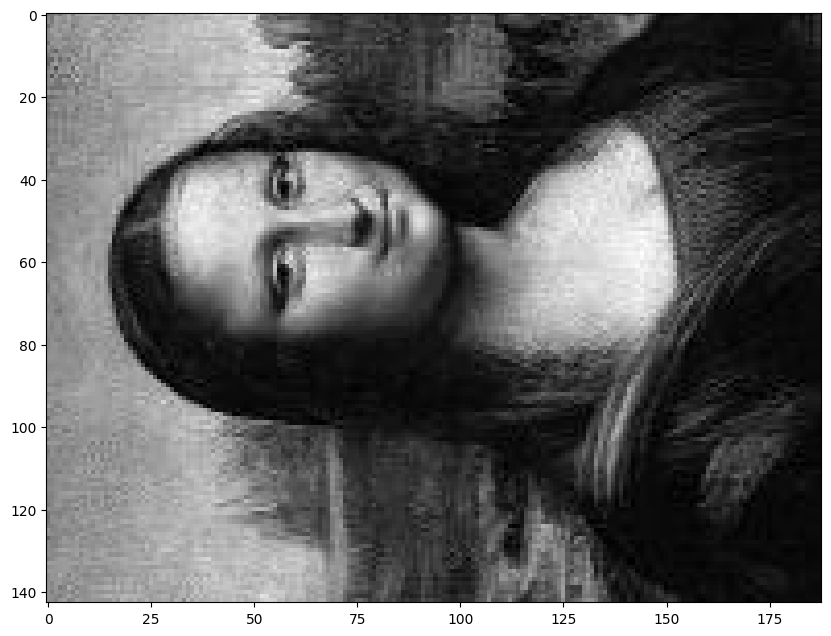

In [70]:
Transposed = TransposeImg(img)
plt.imshow(Transposed, cmap='gray')

Agrandissement avec interpolation plus proche voisin :

In [71]:
import numpy as np

def interpolationFunction(image, y, x):

    if x < 0 or x >= image.shape[1] or y < 0 or y >= image.shape[0]:
        return 0.0
    nearest_x = int(round(x))
    nearest_y = int(round(y))
    return image[nearest_y, nearest_x]

def expand(image, factor):
    assert factor > 0
    res = np.zeros(((image.shape[0] - 1) * factor, (image.shape[1] - 1) * factor), dtype=np.float32)

    # Parcourir la matrice résultante
    for y in range(res.shape[0]):
        for x in range(res.shape[1]):
            orig_x = x / float(factor)
            orig_y = y / float(factor)

            # Appeler la fonction d'interpolation pour obtenir la valeur du pixel
            value = interpolationFunction(image, orig_y, orig_x)

            # Assigner la valeur obtenue à la position correspondante dans la matrice résultante
            res[y, x] = value

    return res


(374, 284)

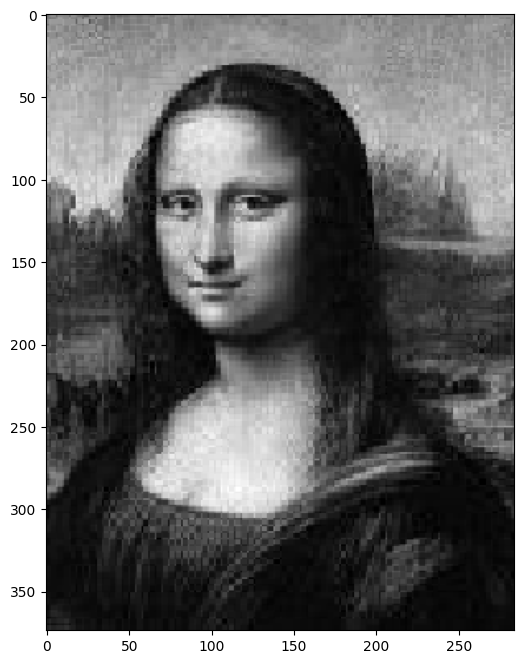

In [74]:
enlarged=expand(img,2)
plt.imshow(enlarged, cmap='gray')
enlarged.shape

(748, 568)

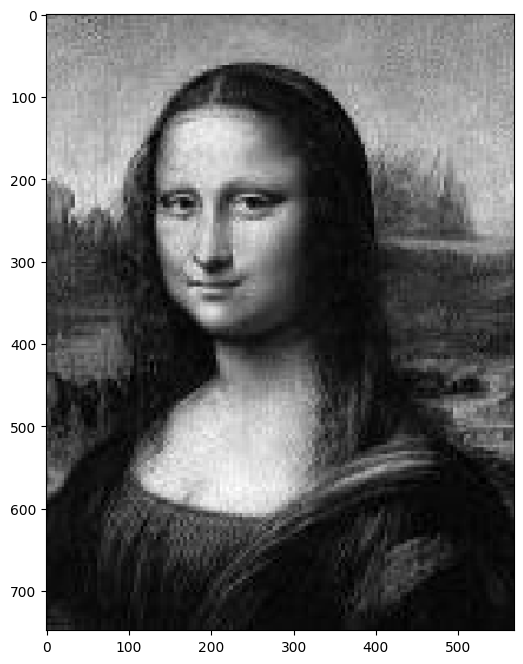

In [75]:
enlarged=expand(img,4)
plt.imshow(enlarged, cmap='gray')
enlarged.shape